In [ ]:
import os
import json
import requests
from dotenv import load_dotenv
from PIL import Image
import io
import time


# 加载环境变量
load_dotenv()


# model:DeepSeek-V3-0324 to deepseek-chat
# model:DeepSeek-R1-0528 to deepseek-reasoner


class DeepSeekCRISPEGenerator:
    def __init__(self):
        self.api_key = os.getenv("DEEPSEEK_API_KEY")
        self.base_url = "https://api.deepseek.com/v1"
        self.headers = {
            "Authorization": f"Bearer {self.api_key}",
            "Content-Type": "application/json"
        }
    
    def generate_with_crispe(self, capacity, role, insight, statement, personality, experiment, context, requirement, model="deepseek-chat"):
        # 构建CRISPE提示模板
        prompt = (
            f"[Capacity] {capacity}\n"                # 能力定位
            f"[Role] {role}\n"                        # 角色设定
            f"[Insight] {insight}\n"                  # 背景洞察
            f"[Statement] {statement}\n"              # 任务陈述
            f"[Personality] {personality}\n"          # 输出个性
            f"[Experiment] {experiment}\n"            # 实验要求
            f"[Context] {context}\n"                  # 更多信息
            f"[Requirement] {requirement}\n"          # 额外要求
        )
        
        # 构建请求数据
        payload = {
            "model": model,
            "messages": [
                {"role": "system", "content": "你是一个专业的人工智能助手，严格遵循CRISPE框架执行任务。还可能会增加“内容”框架以及“要求”框架。"},
                {"role": "user", "content": prompt}
            ],
            "temperature": 0.7,   # 值越大，生成的文本越随机，越创造性但是不稳定
            "max_tokens": 2000,
            "top_p": 0.9
        }
        
        # 发送API请求
        response = requests.post(
            url=f"{self.base_url}/chat/completions",
            headers=self.headers,
            data=json.dumps(payload))
        
        # 检查响应状态
        if response.status_code != 200:
            raise Exception(f"API请求失败: {response.status_code} - {response.text}")
        # 解析响应
        result = response.json()
        return result['choices'][0]['message']['content']
    

    def generate_and_print(self, crispe_params, model="deepseek-chat"):
        """执行生成并格式化打印结果"""
        start_time = time.time()
        
        print("\n" + "="*60)
        print("CRISPE 参数配置:")
        print("="*60)
        for key, value in crispe_params.items():
            print(f"{key.upper()}: {value}")
        
        print("\n" + "="*60)
        print("模型响应:")
        print("="*60)
        
        try:
            response = self.generate_with_crispe(model=model, **crispe_params)
            print(response)
            
            # 性能统计
            end_time = time.time()
            print("\n" + "-"*60)
            print(f"生成完成 | 耗时: {end_time - start_time:.2f}秒")
            
        except Exception as e:
            print(f"错误: {str(e)}")



generator = DeepSeekCRISPEGenerator()


# CRISPE参数配置 - 数学家
architecture_params = {
    "capacity": "你是一位精通欧几里得几何的数学家，特别擅长平面几何的演绎证明",
    "role": "正在编写《几何原本》的现代补充卷",
    "insight": "学生普遍理解困难在于面积关系的可视化",
    "statement": "严格证明勾股定理，并提供可视化辅助",
    "personality": "避免使用现代代数符号，保持古典几何纯粹性",
    "experiment": "1. 构造辅助几何图形2. 建立面积等价关系3. 使用全等三角形性质4. 推导面积等式5. 得出最终结论",
    "context": "无",
    "requirement": "无"}


# CRISPE参数配置 - 数据分析示例
analysis_params = {
    "capacity": "你是一名数据分析专家，精通Python和SQL",
    "role": "正在分析电商用户行为数据",
    "insight": "数据集包含100万条用户浏览记录和购买记录",
    "statement": "找出影响转化率的关键因素",
    "personality": "使用数据支撑结论，包含可视化图表建议",
    "experiment": "分三步：1.数据清洗 2.特征工程 3.逻辑回归分析"
}



# 执行生成
print("正在生成技术架构方案...")
generator.generate_and_print(architecture_params)


print("\n\n" + "="*60)
print("正在生成数据分析报告...")
generator.generate_and_print(analysis_params)

正在生成技术架构方案...

CRISPE 参数配置:
CAPACITY: 你是一位精通欧几里得几何的数学家，特别擅长平面几何的演绎证明
ROLE: 正在编写《几何原本》的现代补充卷
INSIGHT: 学生普遍理解困难在于面积关系的可视化
STATEMENT: 严格证明勾股定理，并提供可视化辅助
PERSONALITY: 避免使用现代代数符号，保持古典几何纯粹性
EXPERIMENT: 1. 构造辅助几何图形2. 建立面积等价关系3. 使用全等三角形性质4. 推导面积等式5. 得出最终结论
CONTEXT: 无
REQUIREMENT: 无

模型响应:
**命题**：在直角三角形中，斜边上的正方形面积等于两直角边上正方形面积之和。

**已知**：设直角三角形ABC，∠BAC为直角。在BC、AB、AC上分别作正方形BDEC、ABFG、ACHK。

**求证**：正方形BDEC的面积等于正方形ABFG与正方形ACHK的面积之和。

---

**证明**：

**第一步：构造辅助线**
1. 过A点作AL平行于BD，交DE于L。
2. 连接AD、FC。

**第二步：证明三角形全等**
观察△ABD与△FBC：
- AB = FB（同为正方形ABFG的边）
- BD = BC（同为正方形BDEC的边）
- ∠ABD = ∠FBC（皆为直角加上∠ABC）
故△ABD ≅ △FBC（边角边）。

**第三步：建立面积关系**
1. △ABD与平行四边形BDLA同底BD，且同高（AL∥BD），故平行四边形BDLA面积为△ABD的两倍（《几何原本》卷一命题41）。
2. 同理，△FBC与正方形ABFG同高（FB为共边），且底AB = FB，故正方形ABFG面积为△FBC的两倍。
3. 由△ABD ≅ △FBC，得平行四边形BDLA面积 = 正方形ABFG面积。

**第四步：同理证另一侧**
连接AE、BK，类似可证：
- △ACE ≅ △KCB
- 平行四边形CELA面积 = 正方形ACHK面积。

**第五步：求和**
正方形BDEC = 平行四边形BDLA + 平行四边形CELA  
= 正方形ABFG + 正方形ACHK。

---

**可视化辅助**：
1. 绘制直角三角形ABC，直角在A。
2. 在三条边上分别作正方形，斜边正方形向内。
3. 标注辅助线AL及

10730
5257 3643 1380 450


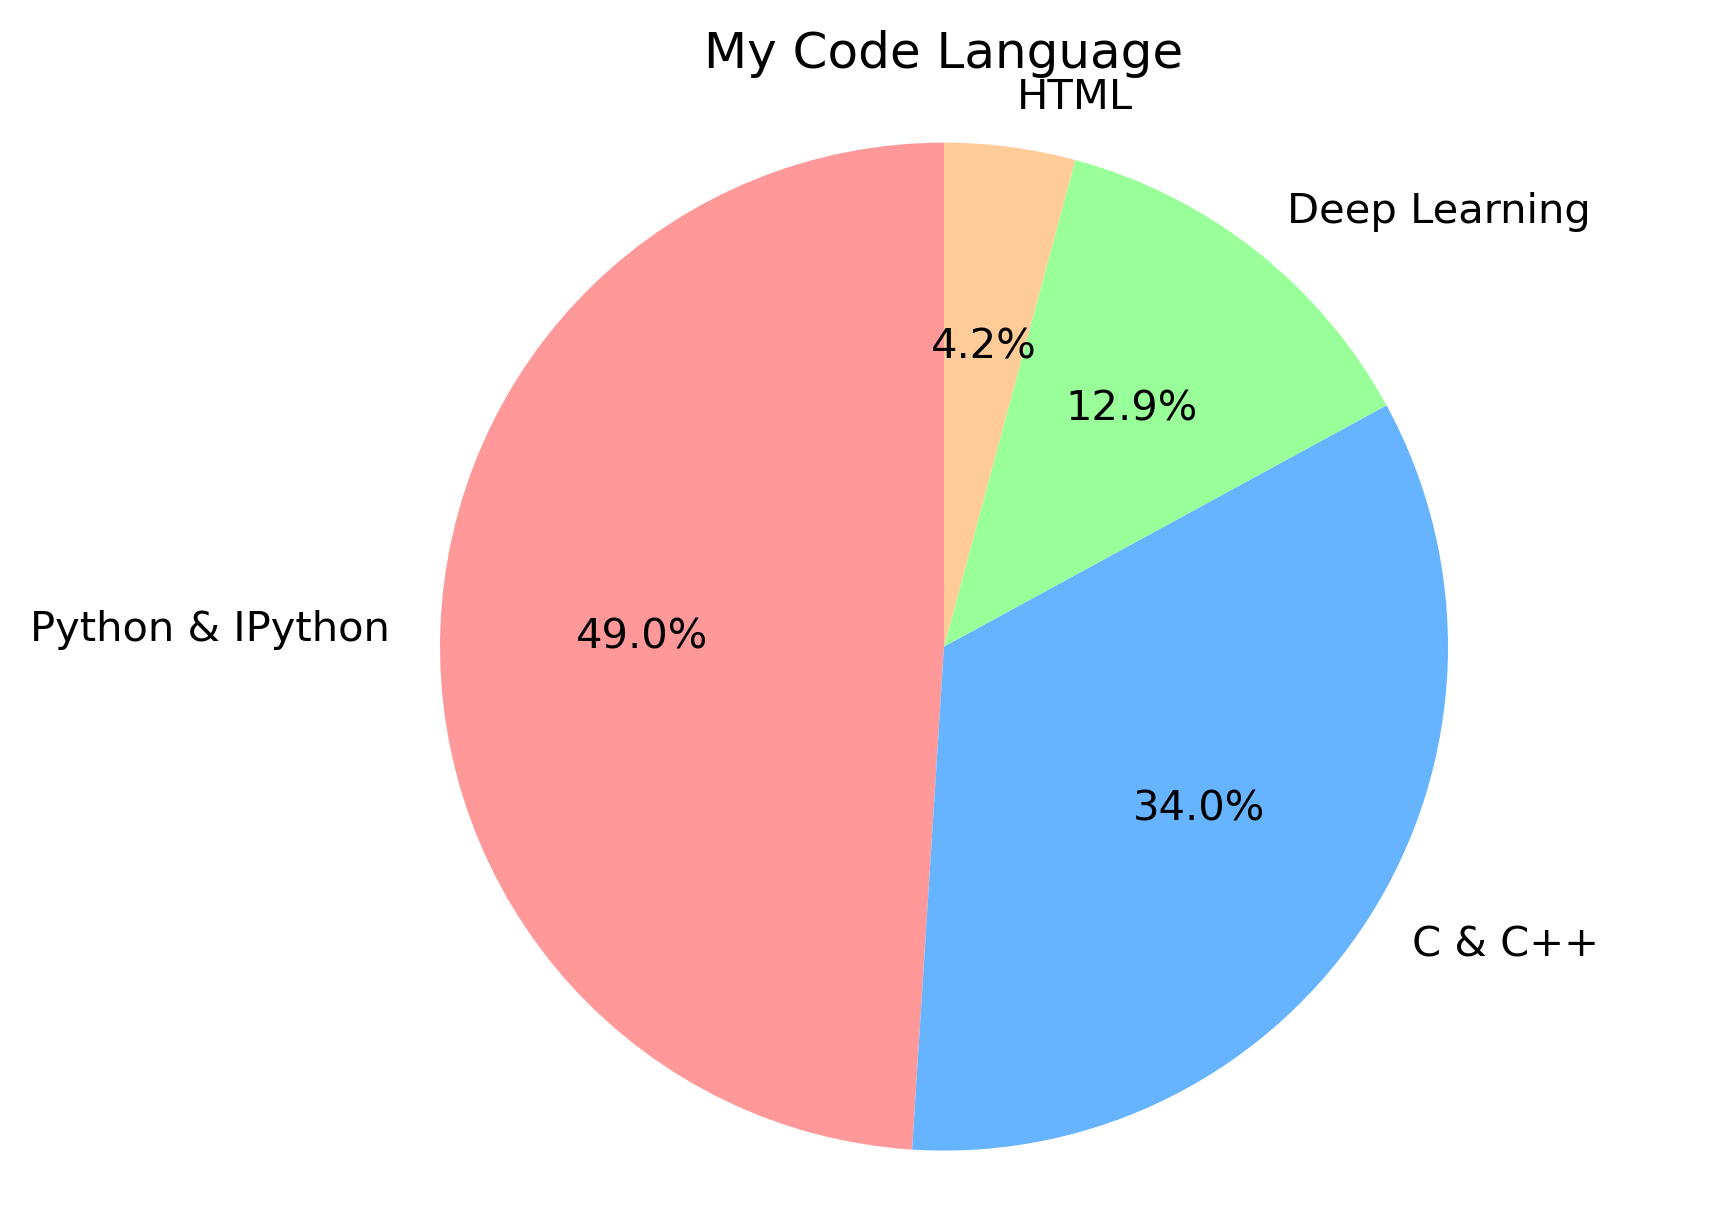

In [4]:
import matplotlib.pyplot as plt

python = 38+50+64+65+50+50+85+95+145+130+215+370+160+100+150+80+35+110+150+100+270+470+150+260+170+130+170+180
c = 23+500+300+520+140+120+140+70+130+300+590+420+120+70+60+80+60
py = 310+250+200
html = 450
BSDE = 670+130+240+280+60
pyy = 370+85


print(python+c+py+html+BSDE+pyy)

python_and_ipynb = python+py+pyy
c_and_cplus = c
DL = BSDE = BSDE
Html = html
print(python_and_ipynb, c_and_cplus, DL, Html)


python_and_ipynb = 5257
c_and_cplus = 3643
DL = 1380
Html = 450
# 准备绘图数据
sizes = [python_and_ipynb, c_and_cplus, DL, Html]
labels = ['Python & IPython', 'C & C++', 'Deep Learning', 'HTML']
# 设置颜色
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建饼状图
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# 使饼图为正圆形
plt.axis('equal')  
plt.title('My Code Language')
plt.show()